In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

#data processing
import re, string
import nltk

from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

#keras
import tensorflow as tf
from tensorflow import keras

#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

#set seed for reproducibility
seed=42

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('drive/MyDrive/Dataset/emotion-dataset/emotion_analysis.csv')
df1.head()

,Sl no,Tweets,Search key,Feeling
0,1,"#1: @fe ed ""RT @MirayaDizon1: Time is ticking...",happy moments,happy
1,2,"#2: @蓮花 &はすか ed ""RT @ninjaryugo: ＃コナモンの日 だそうで...",happy moments,happy
2,3,"#3: @Ris ♡ ed ""Happy birthday to one smokin h...",happy moments,happy
3,4,"#4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...",happy moments,happy
4,5,"#5: @Madhurima wth u vc♥ ed ""Good morning dea...",happy moments,happy


In [ ]:
df2 = pd.read_csv('drive/MyDrive/Dataset/text_emotion.csv') 
df2.head()

,tweet_id,sentiment,author,content
0,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
1,1956967696,sadness,coolhappinessky,happinesseral ceremony...gloomy friday...
2,1956968477,worry,xxxPEACHESxxx,Re-pinging @ghostridah14: why didn't you go to...
3,1956968487,sadness,ShansBee,"I should be sleep, but im not! thinking about ..."
4,1956968636,worry,mcsleazy,Hmmm. http://www.djhero.com/ is down


### Renamed columns to merge easily

In [ ]:
df2.rename(columns={'sentiment':'Feeling', 'content':'Tweets'}, inplace=True)
df2 = df2.drop(['tweet_id', 'author'], axis=1)

In [ ]:
df2 = df2[['Tweets', 'Feeling']]

In [ ]:
df1 = df1.drop(['Sl no', 'Search key'], axis=1)

In [ ]:
class_values = df1['Feeling'].unique()
print(class_values)

['happy' 'sad' 'angry' 'fear' 'disgust' 'surprise']


In [ ]:
class_values = df2['Feeling'].unique()
print(class_values)

['sadness' 'worry' 'love' 'happiness' 'hate']


In [ ]:
df1['Feeling'].value_counts()

happy       3928
sad         2849
angry       1341
fear         863
disgust      637
surprise     399
Name: Feeling, dtype: int64

In [ ]:
df2['Feeling'].value_counts()

worry        8459
happiness    6985
sadness      5164
love         3842
hate         1323
Name: Feeling, dtype: int64

### Mapped emotion labels: happiness -> happy, sadness -> sad, hate -> angry and worry -> fear

In [ ]:
df2['Feeling'] = df2['Feeling'].replace(['happiness'], 'happy')
df2['Feeling'] = df2['Feeling'].replace(['sadness'], 'sad')

In [ ]:
df2['Feeling'] = df2['Feeling'].replace(['hate'], 'angry')
df2['Feeling'] = df2['Feeling'].replace(['worry'], 'fear')

### Selected similar number of emotions to have a balanced dataset

In [ ]:
df1_happy = df1[df1['Feeling'] == 'happy']
df1_happy = df1_happy.sample(frac=1).reset_index(drop=True)
df1_happy = df1_happy[:1341]

In [ ]:
df1_sad = df1[df1['Feeling'] == 'sad']
df1_sad = df1_sad.sample(frac=1).reset_index(drop=True)
df1_sad = df1_sad[:1341]

In [ ]:
df1_anger = df1[df1['Feeling'] == 'angry']
df1_anger = df1_anger.sample(frac=1).reset_index(drop=True)

In [ ]:
df1_fear = df1[df1['Feeling'] == 'fear']
df1_fear = df1_fear.sample(frac=1).reset_index(drop=True)

In [ ]:
df2_happy = df2[df2['Feeling'] == 'happy']
df2_happy = df2_happy.sample(frac=1).reset_index(drop=True)
df2_happy = df2_happy[:1323]

In [ ]:
df2_sad = df2[df2['Feeling'] == 'sad']
df2_sad = df2_sad.sample(frac=1).reset_index(drop=True)
df2_sad = df2_sad[:1323]

In [ ]:
df2_anger = df2[df2['Feeling'] == 'angry']
df2_anger = df2_anger.sample(frac=1).reset_index(drop=True)

In [ ]:
df2_fear = df2[df2['Feeling'] == 'fear']
df2_fear = df2_fear.sample(frac=1).reset_index(drop=True)
df2_fear = df2_fear[:1323]

### Concatenated both datasets individually

In [ ]:
df1_final = pd.concat([df1_happy, df1_fear, df1_anger, df1_sad], axis=0)
df1_final = df1_final.sample(frac=1).reset_index(drop=True)

In [ ]:
df2_final = pd.concat([df2_happy, df2_fear, df2_sad, df2_anger], axis=0)
df2_final = df2_final.sample(frac=1).reset_index(drop=True)

In [ ]:
df1_final['Feeling'].value_counts()

happy    1341
angry    1341
sad      1341
fear      863
Name: Feeling, dtype: int64

In [ ]:
df2_final['Feeling'].value_counts()

sad      1323
angry    1323
fear     1323
happy    1323
Name: Feeling, dtype: int64

### Split data 80:20 for each dataset and merged them to get an equal number of data from both

In [ ]:
train_data1, test_data1 = train_test_split(df1_final, test_size=0.2)

In [ ]:
train_data2, test_data2 = train_test_split(df2_final, test_size=0.2)

In [ ]:
dataset = pd.concat([train_data1, train_data2], axis=0)
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

,Tweets,Feeling
0,Missed FMA...,fear
1,I FOUND A PROM DRESS,happy
2,i wish i was in cali wit mari nd lupita seeing...,sad
3,@jenkellytisdale good luck haha i loved your...,sad
4,"Tweet #87: @Chowkidar Ricky Sharma tweeted ""@M...",angry


In [ ]:
emotion = np.array(dataset['Feeling'])
len(emotion)

8141

In [ ]:
class_values = dataset['Feeling'].unique()
print(class_values)

['fear' 'happy' 'sad' 'angry']


In [ ]:
dataset.groupby('Feeling')['Tweets'].count()

Feeling
angry    2127
fear     1759
happy    2111
sad      2144
Name: Tweets, dtype: int64

<Axes: title={'center': 'Emotion Distribution'}, xlabel='Feeling'>

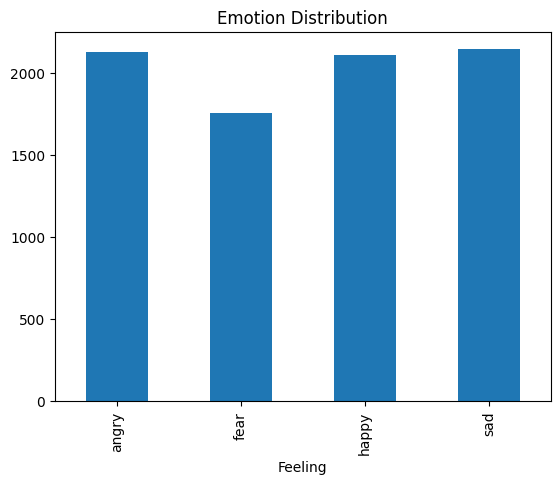

In [ ]:
dataset.groupby('Feeling')['Tweets'].count().plot(kind='bar' , title= 'Emotion Distribution')

In [ ]:
unseen_test_data = pd.concat([test_data1, test_data2], axis=0)
unseen_test_data = unseen_test_data.sample(frac=1).reset_index(drop=True)
unseen_test_data.head()

,Tweets,Feeling
0,"#37: @Johnny Angel ed ""@RealCandaceO Candace,...",sad
1,Heading to yale.. Grandmother in car accident,fear
2,"Omg, I'm a murdere! I accidently just killed a...",fear
3,@inkrediblenyc hey Lonnie! I'll be there next ...,happy
4,"#43: @not tom ed ""I feel sorry for the fellow...",happy


In [ ]:
import re

import pickle as pkl
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from nltk import SnowballStemmer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation , Embedding, GlobalMaxPooling1D, Bidirectional

from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
def preprocess_word(word):
    # Remove punctuation
    word = word.strip('"?!,.():;')
    # Convert more than 2 letter repetitions to 2 letter
    # funnnnny --> funny
    word = re.sub(r'(.)\1+', r'\1\1', word)
    # Remove - & '
    #word = re.sub(r'(-|\')', '', word)
    return word

In [ ]:
def is_valid_word(word):
    # Check if word begins with an alphabet
    return (re.search(r'^[a-zA-Z][a-z0-9A-Z\._]*$', word) is not None)

In [ ]:
def handle_emojis(text):
    # Smile -- :), : ), :-), (:, ( :, (-:, :')
    text = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' smile ', text)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    text = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' laugh ', text)
    # Love -- <3, :*
    text = re.sub(r'(<3|:\*)', ' love ', text)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    text = re.sub(r'(;-?\)|;-?D|\(-?;)', ' affection ', text)
    # Sad -- :-(, : (, :(, ):, )-:
    text = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' sad ', text)
    # Cry -- :,(, :'(, :"(
    text = re.sub(r'(:,\(|:\'\(|:"\()', ' cry ', text)
    return text

In [ ]:
def preprocess_text(text):
    processed_text = []
    # Convert to lower case
    text = text.lower()
    #HTML removed
    #html_process = BS(text, 'html.parser')
    #text = html_process.get_text()
    
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    
    # Replaces URLs with the word URL
    text = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', ' ', text)
    # Replace @handle with the word USER_MENTION
    text = re.sub(r'@[\S]+', ' ', text)
    # Replaces #hashtag with hashtag
    text = re.sub(r'#(\S+)', r' \1 ', text)
    # Remove RT (retext)
    text = re.sub(r'\brt\b', '', text)
    # Replace 2+ dots with space
    text = re.sub(r'\.{2,}', ' ', text)
    # Strip space, " and ' from text
    #text = text.strip(' "\'')
    # Replace emojis with either EMO_POS or EMO_NEG
    text = handle_emojis(text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    # Striping numbers from the text
    text = re.sub(r'\d+', '', text)
    
    
    words = text.split()
    
    stemmer = SnowballStemmer('english')

    #Removing Stop Words and Stemming the Words
    for word in words:
        word = preprocess_word(word)
        #if word not in nltk_stop_words and len(word)> 2:
        
        if is_valid_word(word):
            stemmed_words = stemmer.stem(word)
            processed_text.append(word)

    return ' '.join(processed_text)

In [ ]:
dataset['Tweets'] = dataset['Tweets'].map(lambda x: preprocess_text(x))
dataset.head()

,Tweets,Feeling
0,missed fma,fear
1,i found a prom dress,happy
2,i wish i was in cali wit mari nd lupita seeing...,sad
3,good luck haha i loved your character in the b...,sad
4,tweet ricky sharma tweeted g aapne besharmi ki...,angry


In [ ]:
label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(emotion)

print(label_encoder.classes_)

label_OneHotEncoder = OneHotEncoder()
encoded_label = label_OneHotEncoder.fit_transform(encoded_label.reshape(-1,1)).toarray()

['angry' 'fear' 'happy' 'sad']


In [ ]:
vocabulary_size = 10000
input_length = 100

In [ ]:
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(dataset['Tweets'])
sequences = tokenizer.texts_to_sequences(dataset['Tweets'])
data = pad_sequences(sequences, maxlen = input_length)

file = open('saved_model\\tokenizer.pickle', 'wb')
pkl.dump(tokenizer, file, protocol = pkl.HIGHEST_PROTOCOL)
file.close()

In [ ]:
train_data_actual, test_data_actual, train_label, test_label = train_test_split(data, encoded_label, test_size = 0.2)

In [ ]:
num_classes = len(class_values)
validation_split = 0.1

In [ ]:
output_dim = 1000
dense_input = 1000

l1_dropout = 0.2
l1_recurrent_dropout = 0.2

l2_dropout = 0.2
l2_recurrent_dropout = 0.2

l1_lstm_units = 128
l2_lstm_units = 64

validation_split = 0.2
epochs = 20

callback_patience = 2

In [ ]:
callback = [EarlyStopping(monitor='val_loss', patience = callback_patience)]

In [ ]:
from tensorflow.keras.layers import LeakyReLU

In [ ]:
model = Sequential()

model.add(Embedding(vocabulary_size, dense_input, input_length=input_length))
model.add(Dense(dense_input, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(l1_lstm_units, dropout=l1_dropout, recurrent_dropout=l1_recurrent_dropout, 
                             return_sequences=True, activation='tanh'))
model.add(LSTM(l2_lstm_units, dropout=l2_dropout, recurrent_dropout=l2_recurrent_dropout, 
                             return_sequences=False, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='relu'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 1000)         10000000  
                                                                 
 dense_6 (Dense)             (None, 100, 1000)         1001000   
                                                                 
 dropout_6 (Dropout)         (None, 100, 1000)         0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 128)          578048    
                                                                 
 lstm_7 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 4)                

In [ ]:
history = model.fit(train_data_actual, train_label, validation_split=validation_split, epochs=epochs, 
                    shuffle = True, callbacks = callback)

Epoch 1/20
163/163 [==============================] - 308s 2s/step - loss: nan - accuracy: 0.2611 - val_loss: nan - val_accuracy: 0.2417
Epoch 2/20
163/163 [==============================] - 307s 2s/step - loss: nan - accuracy: 0.2611 - val_loss: nan - val_accuracy: 0.2417


In [ ]:
model.evaluate(test_data_actual, test_label, verbose = 1)

51/51 [==============================] - 15s 295ms/step - loss: nan - accuracy: 0.2713


[nan, 0.27133211493492126]

In [ ]:
def label_tweet(twt):
  test_text = twt
  test_text = pd.Series(preprocess_text(test_text))

  sequences = tokenizer.texts_to_sequences(test_text)
  data = pad_sequences(sequences, maxlen = input_length)
  lbl = label_encoder.classes_[np.argmax(model.predict(data))]
  return lbl

In [ ]:
unseen_test_data['predicted'] = unseen_test_data['Tweets'].apply(lambda func: label_tweet(func))

In [ ]:
model.save('merged_emo_model.h5')

In [ ]:
unseen_test_data.to_csv('utd_emo.csv')

In [ ]:
y_true = np.asarray(unseen_test_data['Feeling'])
y_pred = np.asarray(unseen_test_data['predicted'])

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.confusion_matrix(y_true, y_pred))

[[315  82  44  97]
 [ 29 249  63 113]
 [ 31 113 295  76]
 [ 50 112  58 310]]


In [ ]:
print(metrics.classification_report(y_true, y_pred, digits=3))

              precision    recall  f1-score   support

       angry      0.741     0.586     0.654       538
        fear      0.448     0.548     0.493       454
       happy      0.641     0.573     0.605       515
         sad      0.520     0.585     0.551       530

    accuracy                          0.574      2037
   macro avg      0.588     0.573     0.576      2037
weighted avg      0.593     0.574     0.579      2037



In [ ]:
X_test = np.asarray(unseen_test_data['Tweets'])
y_test = np.asarray(unseen_test_data['Feeling'])

In [ ]:
df = pd.read_csv('/content/emo_gv_Mar17.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Id,Tweet,Language,Created At,Topic,Query,pred emotion
0,6414ae599300c221cb045913,As gun violence continues to traumatize an ent...,en,2023-03-17,Gun Violence,gun violence,happy
1,6414ae5a9300c221cb045914,"@will5023 @RedThreads_io @POTUS However, we ha...",en,2023-03-17,Gun Violence,gun violence,disgust
2,6414ae5a9300c221cb045915,@SamFrayer @cavilrest Maybe Ms. Appiah can get...,en,2023-03-17,Gun Violence,gun violence,happy
3,6414ae5a9300c221cb045916,@BennyJanssens60 @RobCyubahiro @BBCBreaking As...,en,2023-03-17,Gun Violence,gun violence,happy
4,6414ae5a9300c221cb045917,@GoBlueFlorida1 Yeah you canât take Republic...,en,2023-03-17,Gun Violence,gun violence,happy


In [ ]:
from keras.models import load_model
model = load_model('/content/merged_emo_model.h5')

In [ ]:
df['predicted_new'] = df['Tweet'].apply(lambda func: label_tweet(func))

In [ ]:
df.to_csv('df1.csv')

predicted_new
angry    9480
fear     2141
happy    1933
sad      3691
dtype: int64


<Axes: >

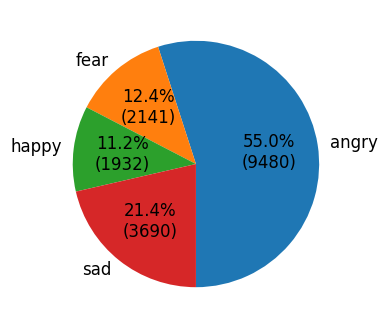

In [ ]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

sentiment_counts = df.groupby(['predicted_new']).size()
print(sentiment_counts)
labels = ['sad', 'happy', 'angry', 'fear']
# Let's visualize the sentiments
fig = plt.figure(figsize=(4,4), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct=lambda pct: func(pct, sentiment_counts), startangle=270, fontsize=12, label="")